In [1]:
import tensorflow as tf
from psychrnn.backend.models.basic import Basic
from psychrnn.backend.gain.gain5 import Gain5

from psychrnn.backend.gain.loss import rt_mask_mse_06, rt_mask_mse_07, rt_mask_mse_08
from psychrnn.tasks.checkerPmd3 import Checkerboard2AFC

from tqdm import tqdm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline



# configuration = tf.compat.v1.ConfigProto()
# configuration.gpu_options.allow_growth = True
# session = tf.compat.v1.Session(config=configuration)

In [2]:
experiment = 'interactive'
name = 'basic'
dt = 10
tau = 50
T = 5000
N_batch = 10
N_rec = 100

g0_bound = [0.1, 1]
gSlope_bound = [0,0]


# Generate a batch of trials with linear gain

In [3]:
task = Checkerboard2AFC(dt=dt, tau=tau, T=T, N_batch=N_batch, g0_bound = g0_bound, gSlope_bound = gSlope_bound, noise = 0.25)

In [4]:
params = task.get_task_params()
params

{'N_batch': 10,
 'N_in': 2,
 'N_out': 2,
 'dt': 10,
 'tau': 50,
 'T': 5000,
 'alpha': 0.2,
 'N_steps': 500,
 'coherence': [0, 1],
 'side': 0.5,
 'noise': 0.25,
 'target_onset': [250, 500],
 'checker_onset': [500, 1000],
 'accumulation_mask': 300,
 'decision_threshold': 0.7,
 'post_decision_baseline': 0.2,
 'wait': 0.2,
 'hi': 1,
 'lo': 0,
 'g0_bound': [0.1, 1],
 'gSlope_bound': [0, 0]}

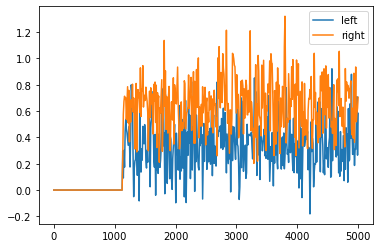

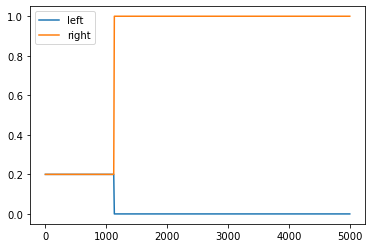

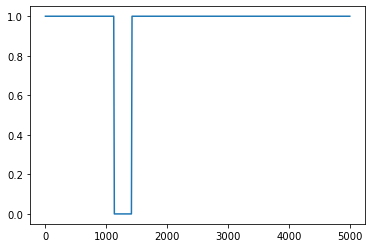

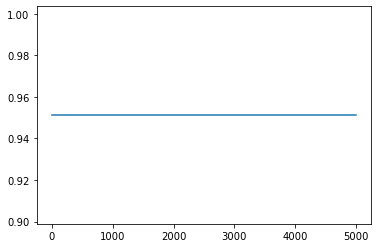

[0.95125261 0.        ]
{'coherence': 0.33407286602535313, 'noise': 0.25, 'accumulation_mask': 300, 'target_onset': 295, 'checker_onset': 825, 'g0_bound': [0.1, 1], 'gSlope_bound': [0, 0]}


In [5]:
[x, y, mask, allParams, g, gainParams, weightMaskA, weightMaskM] = task.get_trial_batch()

trialNum = 0
# x[1]: left tartet evidence
# x[2]: right target evidence
trialIn = x[trialNum,:,:]
trialOut = y[trialNum,:,:]
trialMask = mask[trialNum,:,:]
time = np.linspace(0, task.T, int(task.T/task.dt))
# plot input to the model
plt.figure()
plt.plot(time, trialIn[:,0], label = 'left')
plt.plot(time, trialIn[:,1], label = 'right')
plt.legend()

# plot output to the model
plt.figure()
plt.plot(time, trialOut[:,0], label = 'left')
plt.plot(time, trialOut[:,1], label = 'right')
plt.legend()
# plot trial masks
plt.figure()
plt.plot(time, trialMask[:,0])
# plot gain
plt.figure()
plt.plot(time, g[trialNum,:,:])
plt.show()
print(gainParams[trialNum,:])
print(allParams[trialNum])

In [6]:
# check weightMaskA and weightMaskM 
# sum of weightMaskA should be same as absCheckerOn
# sum of weightMaskA and weightMaskM should be total time step
print(np.sum(weightMaskA[trialNum,:,:]))
print(np.sum(weightMaskM[trialNum,:,:]))

absCheckerOn = round((allParams[trialNum]['target_onset'] + allParams[trialNum]['checker_onset'])/10)
absCheckerOn

112.0
388.0


112

# Set Network params

In [7]:
network_params = task.get_task_params()
network_params['name'] = name
network_params['N_rec'] = N_rec
network_params['rec_noise'] = 0.5

network_params["transfer_function"] = tf.nn.relu
network_params["output_transfer_function"] = tf.nn.sigmoid

network_params["loss_function"] = "rt_mask_mse"
network_params["rt_mask_mse"] = rt_mask_mse_07


In [8]:
try:
    model.destruct()
except:
    pass

model = Gain5(network_params)
model.output_transfer_function = network_params.get(
    "output_transfer_function", tf.nn.relu
)
model.decision_threshold = network_params.get("decision_threshold", np.inf)

In [9]:
# check model
# vars(model)

# a = model.get_weights()
# a.keys()

In [10]:
# vars(model)

# Set Training params & Train

In [11]:
trials = 10000
train_params = {}
train_params['save_weights_path'] =  "./checkerPmdGain5"
train_params['training_iters'] = trials
train_params['learning_rate'] = .001
train_params['loss_epoch'] = 10
train_params['save_training_weights_epoch'] = 1000 / N_batch
train_params['training_weights_path'] = None

In [12]:
losses, initialTime, trainTime = model.train(task, train_params)
loss_name = "./checkerPmdGain5.txt"
print("Save losses to " + loss_name)
with open(loss_name, 'w') as f:
    for item in losses:
        f.write("%s\n" % item)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(1

check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)


check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)
check
(10, 100)
(10, 2)
(100, 2)
(100,)


Iter 1240, Minibatch Loss= 0.601728
Iter 1250, Minibatch Loss= 0.601728
Iter 1260, Minibatch Loss= 0.601856
Iter 1270, Minibatch Loss= 0.601600
Iter 1280, Minibatch Loss= 0.601600
Iter 1290, Minibatch Loss= 0.601600
Iter 1300, Minibatch Loss= 0.601856
Iter 1310, Minibatch Loss= 0.601600
Iter 1320, Minibatch Loss= 0.601728
Iter 1330, Minibatch Loss= 0.601728
Iter 1340, Minibatch Loss= 0.601856
Iter 1350, Minibatch Loss= 0.601600
Iter 1360, Minibatch Loss= 0.601984
Iter 1370, Minibatch Loss= 0.601728
Iter 1380, Minibatch Loss= 0.601728
Iter 1390, Minibatch Loss= 0.601856
Iter 1400, Minibatch Loss= 0.601600
Iter 1410, Minibatch Loss= 0.601984
Iter 1420, Minibatch Loss= 0.601856
Iter 1430, Minibatch Loss= 0.601728
Iter 1440, Minibatch Loss= 0.601600
Iter 1450, Minibatch Loss= 0.601984
Iter 1460, Minibatch Loss= 0.601856
Iter 1470, Minibatch Loss= 0.601728
Iter 1480, Minibatch Loss= 0.601600
Iter 1490, Minibatch Loss= 0.601856
Iter 1500, Minibatch Loss= 0.601728
Iter 1510, Minibatch Loss= 0

Iter 3520, Minibatch Loss= 0.601728
Iter 3530, Minibatch Loss= 0.601984
Iter 3540, Minibatch Loss= 0.601728
Iter 3550, Minibatch Loss= 0.601728
Iter 3560, Minibatch Loss= 0.601856
Iter 3570, Minibatch Loss= 0.601728
Iter 3580, Minibatch Loss= 0.601728
Iter 3590, Minibatch Loss= 0.601728
Iter 3600, Minibatch Loss= 0.601600
Iter 3610, Minibatch Loss= 0.601600
Iter 3620, Minibatch Loss= 0.601728
Iter 3630, Minibatch Loss= 0.601600
Iter 3640, Minibatch Loss= 0.601600
Iter 3650, Minibatch Loss= 0.601600
Iter 3660, Minibatch Loss= 0.601856
Iter 3670, Minibatch Loss= 0.601600
Iter 3680, Minibatch Loss= 0.601600
Iter 3690, Minibatch Loss= 0.601600
Iter 3700, Minibatch Loss= 0.601728
Iter 3710, Minibatch Loss= 0.601728
Iter 3720, Minibatch Loss= 0.601856
Iter 3730, Minibatch Loss= 0.601856
Iter 3740, Minibatch Loss= 0.601856
Iter 3750, Minibatch Loss= 0.601600
Iter 3760, Minibatch Loss= 0.601728
Iter 3770, Minibatch Loss= 0.601728
Iter 3780, Minibatch Loss= 0.601728
Iter 3790, Minibatch Loss= 0

Iter 5800, Minibatch Loss= 0.601728
Iter 5810, Minibatch Loss= 0.601728
Iter 5820, Minibatch Loss= 0.601728
Iter 5830, Minibatch Loss= 0.601600
Iter 5840, Minibatch Loss= 0.601728
Iter 5850, Minibatch Loss= 0.601600
Iter 5860, Minibatch Loss= 0.601728
Iter 5870, Minibatch Loss= 0.601728
Iter 5880, Minibatch Loss= 0.601728
Iter 5890, Minibatch Loss= 0.601856
Iter 5900, Minibatch Loss= 0.601600
Iter 5910, Minibatch Loss= 0.601728
Iter 5920, Minibatch Loss= 0.601856
Iter 5930, Minibatch Loss= 0.601856
Iter 5940, Minibatch Loss= 0.601728
Iter 5950, Minibatch Loss= 0.601600
Iter 5960, Minibatch Loss= 0.601856
Iter 5970, Minibatch Loss= 0.601856
Iter 5980, Minibatch Loss= 0.601728
Iter 5990, Minibatch Loss= 0.601728
Iter 6000, Minibatch Loss= 0.601728
Iter 6010, Minibatch Loss= 0.601728
Iter 6020, Minibatch Loss= 0.601984
Iter 6030, Minibatch Loss= 0.601600
Iter 6040, Minibatch Loss= 0.601856
Iter 6050, Minibatch Loss= 0.601856
Iter 6060, Minibatch Loss= 0.601984
Iter 6070, Minibatch Loss= 0

Iter 8080, Minibatch Loss= 0.601728
Iter 8090, Minibatch Loss= 0.601600
Iter 8100, Minibatch Loss= 0.601600
Iter 8110, Minibatch Loss= 0.601600
Iter 8120, Minibatch Loss= 0.601728
Iter 8130, Minibatch Loss= 0.601728
Iter 8140, Minibatch Loss= 0.601600
Iter 8150, Minibatch Loss= 0.601728
Iter 8160, Minibatch Loss= 0.601728
Iter 8170, Minibatch Loss= 0.601728
Iter 8180, Minibatch Loss= 0.601728
Iter 8190, Minibatch Loss= 0.601600
Iter 8200, Minibatch Loss= 0.601856
Iter 8210, Minibatch Loss= 0.601600
Iter 8220, Minibatch Loss= 0.601600
Iter 8230, Minibatch Loss= 0.601856
Iter 8240, Minibatch Loss= 0.601856
Iter 8250, Minibatch Loss= 0.601728
Iter 8260, Minibatch Loss= 0.601856
Iter 8270, Minibatch Loss= 0.601728
Iter 8280, Minibatch Loss= 0.601728
Iter 8290, Minibatch Loss= 0.601600
Iter 8300, Minibatch Loss= 0.601856
Iter 8310, Minibatch Loss= 0.601856
Iter 8320, Minibatch Loss= 0.601856
Iter 8330, Minibatch Loss= 0.602112
Iter 8340, Minibatch Loss= 0.601728
Iter 8350, Minibatch Loss= 0

Iter 10350, Minibatch Loss= 0.601856
Iter 10360, Minibatch Loss= 0.601728
Iter 10370, Minibatch Loss= 0.601984
Iter 10380, Minibatch Loss= 0.601728
Iter 10390, Minibatch Loss= 0.601600
Iter 10400, Minibatch Loss= 0.601856
Iter 10410, Minibatch Loss= 0.601728
Iter 10420, Minibatch Loss= 0.601600
Iter 10430, Minibatch Loss= 0.601728
Iter 10440, Minibatch Loss= 0.601728
Iter 10450, Minibatch Loss= 0.602112
Iter 10460, Minibatch Loss= 0.601728
Iter 10470, Minibatch Loss= 0.601728
Iter 10480, Minibatch Loss= 0.601600
Iter 10490, Minibatch Loss= 0.601728
Iter 10500, Minibatch Loss= 0.601728
Iter 10510, Minibatch Loss= 0.601728
Iter 10520, Minibatch Loss= 0.601600
Iter 10530, Minibatch Loss= 0.601728
Iter 10540, Minibatch Loss= 0.601600
Iter 10550, Minibatch Loss= 0.601728
Iter 10560, Minibatch Loss= 0.601600
Iter 10570, Minibatch Loss= 0.601728
Iter 10580, Minibatch Loss= 0.601728
Iter 10590, Minibatch Loss= 0.601600
Iter 10600, Minibatch Loss= 0.601600
Iter 10610, Minibatch Loss= 0.601600
I

Iter 12570, Minibatch Loss= 0.601600
Iter 12580, Minibatch Loss= 0.601728
Iter 12590, Minibatch Loss= 0.601600
Iter 12600, Minibatch Loss= 0.601728
Iter 12610, Minibatch Loss= 0.601856
Iter 12620, Minibatch Loss= 0.601728
Iter 12630, Minibatch Loss= 0.601728
Iter 12640, Minibatch Loss= 0.601856
Iter 12650, Minibatch Loss= 0.601728
Iter 12660, Minibatch Loss= 0.601600
Iter 12670, Minibatch Loss= 0.601856
Iter 12680, Minibatch Loss= 0.601856
Iter 12690, Minibatch Loss= 0.601728
Iter 12700, Minibatch Loss= 0.601600
Iter 12710, Minibatch Loss= 0.601600
Iter 12720, Minibatch Loss= 0.601728
Iter 12730, Minibatch Loss= 0.601600
Iter 12740, Minibatch Loss= 0.601856
Iter 12750, Minibatch Loss= 0.601856
Iter 12760, Minibatch Loss= 0.601984
Iter 12770, Minibatch Loss= 0.601728
Iter 12780, Minibatch Loss= 0.601600
Iter 12790, Minibatch Loss= 0.601728
Iter 12800, Minibatch Loss= 0.601600
Iter 12810, Minibatch Loss= 0.601600
Iter 12820, Minibatch Loss= 0.601728
Iter 12830, Minibatch Loss= 0.601856
I

Iter 14790, Minibatch Loss= 0.601600
Iter 14800, Minibatch Loss= 0.601856
Iter 14810, Minibatch Loss= 0.601728
Iter 14820, Minibatch Loss= 0.601728
Iter 14830, Minibatch Loss= 0.601856
Iter 14840, Minibatch Loss= 0.601728
Iter 14850, Minibatch Loss= 0.601984
Iter 14860, Minibatch Loss= 0.601600
Iter 14870, Minibatch Loss= 0.601728
Iter 14880, Minibatch Loss= 0.602112
Iter 14890, Minibatch Loss= 0.601728
Iter 14900, Minibatch Loss= 0.601728
Iter 14910, Minibatch Loss= 0.601600
Iter 14920, Minibatch Loss= 0.601856
Iter 14930, Minibatch Loss= 0.601856
Iter 14940, Minibatch Loss= 0.601856
Iter 14950, Minibatch Loss= 0.601856
Iter 14960, Minibatch Loss= 0.601728
Iter 14970, Minibatch Loss= 0.601856
Iter 14980, Minibatch Loss= 0.601728
Iter 14990, Minibatch Loss= 0.601856
Iter 15000, Minibatch Loss= 0.601600
Iter 15010, Minibatch Loss= 0.601728
Iter 15020, Minibatch Loss= 0.601984
Iter 15030, Minibatch Loss= 0.601856
Iter 15040, Minibatch Loss= 0.601600
Iter 15050, Minibatch Loss= 0.601600
I

Iter 17010, Minibatch Loss= 0.601856
Iter 17020, Minibatch Loss= 0.601600
Iter 17030, Minibatch Loss= 0.601600
Iter 17040, Minibatch Loss= 0.601984
Iter 17050, Minibatch Loss= 0.601728
Iter 17060, Minibatch Loss= 0.601984
Iter 17070, Minibatch Loss= 0.601728
Iter 17080, Minibatch Loss= 0.601728
Iter 17090, Minibatch Loss= 0.601600
Iter 17100, Minibatch Loss= 0.601856
Iter 17110, Minibatch Loss= 0.601600
Iter 17120, Minibatch Loss= 0.601856
Iter 17130, Minibatch Loss= 0.601600
Iter 17140, Minibatch Loss= 0.601728
Iter 17150, Minibatch Loss= 0.601600
Iter 17160, Minibatch Loss= 0.601856
Iter 17170, Minibatch Loss= 0.601728
Iter 17180, Minibatch Loss= 0.601728
Iter 17190, Minibatch Loss= 0.601728
Iter 17200, Minibatch Loss= 0.601728
Iter 17210, Minibatch Loss= 0.601600
Iter 17220, Minibatch Loss= 0.601600
Iter 17230, Minibatch Loss= 0.601600
Iter 17240, Minibatch Loss= 0.601856
Iter 17250, Minibatch Loss= 0.601600
Iter 17260, Minibatch Loss= 0.601856
Iter 17270, Minibatch Loss= 0.601600
I

Iter 19230, Minibatch Loss= 0.601856
Iter 19240, Minibatch Loss= 0.601600
Iter 19250, Minibatch Loss= 0.601728
Iter 19260, Minibatch Loss= 0.601600
Iter 19270, Minibatch Loss= 0.601600
Iter 19280, Minibatch Loss= 0.602112
Iter 19290, Minibatch Loss= 0.601728
Iter 19300, Minibatch Loss= 0.601856
Iter 19310, Minibatch Loss= 0.601600
Iter 19320, Minibatch Loss= 0.601728
Iter 19330, Minibatch Loss= 0.601728
Iter 19340, Minibatch Loss= 0.601728
Iter 19350, Minibatch Loss= 0.601728
Iter 19360, Minibatch Loss= 0.601600
Iter 19370, Minibatch Loss= 0.601600
Iter 19380, Minibatch Loss= 0.601728
Iter 19390, Minibatch Loss= 0.601728
Iter 19400, Minibatch Loss= 0.601600
Iter 19410, Minibatch Loss= 0.601728
Iter 19420, Minibatch Loss= 0.601856
Iter 19430, Minibatch Loss= 0.601856
Iter 19440, Minibatch Loss= 0.601600
Iter 19450, Minibatch Loss= 0.601856
Iter 19460, Minibatch Loss= 0.601856
Iter 19470, Minibatch Loss= 0.601856
Iter 19480, Minibatch Loss= 0.601600
Iter 19490, Minibatch Loss= 0.601728
I

Iter 21450, Minibatch Loss= 0.601856
Iter 21460, Minibatch Loss= 0.601728
Iter 21470, Minibatch Loss= 0.601856
Iter 21480, Minibatch Loss= 0.601728
Iter 21490, Minibatch Loss= 0.601600
Iter 21500, Minibatch Loss= 0.601728
Iter 21510, Minibatch Loss= 0.601728
Iter 21520, Minibatch Loss= 0.601856
Iter 21530, Minibatch Loss= 0.601728
Iter 21540, Minibatch Loss= 0.601600
Iter 21550, Minibatch Loss= 0.601600
Iter 21560, Minibatch Loss= 0.601600
Iter 21570, Minibatch Loss= 0.601728
Iter 21580, Minibatch Loss= 0.601600
Iter 21590, Minibatch Loss= 0.601856
Iter 21600, Minibatch Loss= 0.601600
Iter 21610, Minibatch Loss= 0.601600
Iter 21620, Minibatch Loss= 0.601856
Iter 21630, Minibatch Loss= 0.601984
Iter 21640, Minibatch Loss= 0.601728
Iter 21650, Minibatch Loss= 0.601984
Iter 21660, Minibatch Loss= 0.601856
Iter 21670, Minibatch Loss= 0.601600
Iter 21680, Minibatch Loss= 0.601728
Iter 21690, Minibatch Loss= 0.601728
Iter 21700, Minibatch Loss= 0.601600
Iter 21710, Minibatch Loss= 0.601856
I

Iter 23670, Minibatch Loss= 0.601856
Iter 23680, Minibatch Loss= 0.601600
Iter 23690, Minibatch Loss= 0.601600
Iter 23700, Minibatch Loss= 0.601600
Iter 23710, Minibatch Loss= 0.601600
Iter 23720, Minibatch Loss= 0.601728
Iter 23730, Minibatch Loss= 0.601600
Iter 23740, Minibatch Loss= 0.601728
Iter 23750, Minibatch Loss= 0.601600
Iter 23760, Minibatch Loss= 0.601600
Iter 23770, Minibatch Loss= 0.601856
Iter 23780, Minibatch Loss= 0.601856
Iter 23790, Minibatch Loss= 0.601728
Iter 23800, Minibatch Loss= 0.601600
Iter 23810, Minibatch Loss= 0.601600
Iter 23820, Minibatch Loss= 0.601984
Iter 23830, Minibatch Loss= 0.601856
Iter 23840, Minibatch Loss= 0.601728
Iter 23850, Minibatch Loss= 0.601728
Iter 23860, Minibatch Loss= 0.601600
Iter 23870, Minibatch Loss= 0.601728
Iter 23880, Minibatch Loss= 0.601600
Iter 23890, Minibatch Loss= 0.601728
Iter 23900, Minibatch Loss= 0.601856
Iter 23910, Minibatch Loss= 0.601856
Iter 23920, Minibatch Loss= 0.601984
Iter 23930, Minibatch Loss= 0.601600
I

In [13]:
# experiment = 'interactive'
# name = 'basic'
# dt = 10
# tau = 50
# T = 5000
# N_batch = 50
# N_rec = 100

# g0_bound = [0, 1]
# gSlope_bound = [0,0]

# task = Checkerboard2AFC(dt=dt, tau=tau, T=T, N_batch=N_batch, g0_bound = g0_bound, gSlope_bound = gSlope_bound)



# ########################################
# #### set weight path
# ########################################
# weightsPath = "./weights/checkerPmdGain4Multiply.npz"

# network_params = task.get_task_params()
# network_params['name'] = name
# network_params['N_rec'] = N_rec
# network_params['rec_noise'] = 0.1

# network_params["transfer_function"] = tf.nn.relu
# network_params["output_transfer_function"] = tf.nn.sigmoid

# network_params["loss_function"] = "rt_mask_mse"
# network_params["rt_mask_mse"] = rt_mask_mse_07

        
# network_params['load_weights_path'] =  weightsPath


In [14]:
# model2 = Gain4(network_params)

# model2.output_transfer_function = network_params.get(
#     "output_transfer_function", tf.nn.relu
# )
# model2.decision_threshold = network_params.get("decision_threshold", np.inf)

In [15]:
# b = vars(model2)

In [166]:
# weightsPath = "./weights/checkerPmdGain4Multiply.npz"
weightsPath = './weights/checkerPmdGain3Additive.npz'

weightsPath = './weights/checkerPmdGain3NoPreTrain.npz'

# weightsPath = './weights/checkerPmdGain4.npz'
# weightsPath = './weights/checkerPmdGain3A.npz'

# read saved weights
c = dict(np.load(weightsPath, allow_pickle = True))

c['W_rec'].shape

(100, 100)

In [167]:
init_state = c['init_state']
W_in = c['W_in']
W_out = c['W_out']
W_rec = c['W_rec']

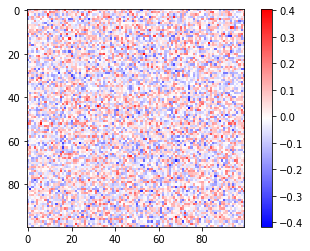

(100, 100)
4997


In [168]:
plt.imshow(W_rec, cmap='bwr', interpolation='nearest')
plt.colorbar()
plt.show()

print(W_rec.shape)
print(np.sum(W_rec > 0))


In [169]:
W_recP = W_rec[W_rec > 0]
print(np.sum(W_recP))
W_recN = W_rec[W_rec < 0]
print(np.sum(W_recN))

W_inP = W_in[W_in > 0]
print(np.sum(W_inP))
W_inN = W_in[W_in < 0]
print(np.sum(W_inN))

W_outP = W_out[W_out > 0]
print(np.sum(W_outP))
W_outN = W_out[W_out < 0]
print(np.sum(W_outN))

439.3316
-415.3725
19.037598
-27.457033
8.938327
-8.537588


In [170]:
sum1 = np.zeros((1000,1))
sum2 = np.zeros((1000,1))
for i in range(sum1.shape[0]):
    simu = np.random.uniform(0, 1, 100)
    simu2 =2*np.random.uniform(0, 1, 100)
#     simu = np.random.uniform(-1, 1, 100)
#     simu2 =2*np.random.uniform(-1, 1, 100)
    r1 = np.dot(W_rec, simu)
    r2 = np.dot(W_rec, simu2)
    sum1[i] = np.sum(r1)
    sum2[i] = np.sum(r2)
    
np.sum(sum2 > sum1)

904

100

In [17]:
# weightMaskA = np.zeros([500, 1])
# weightMaskM = np.zeros([500, 1])
# absCheckerOnset = 200
# weightMaskA[0:absCheckerOnset] = 1
# weightMaskM[absCheckerOnset:] = 1

In [18]:
# np.sum(weightMaskA)

# Test 5000 trials

In [19]:
trials =1000
batches = int(np.ceil(trials / N_batch))

rnn_state = np.zeros((trials, task.N_steps, model.N_rec))
rnn_out = np.zeros((trials, task.N_steps, model.N_out))

coherence = np.zeros(trials)
target_onset = np.zeros(trials)
checker_onset = np.zeros(trials)
decision = np.zeros(trials)
rt = np.zeros(trials)
g0 = np.zeros(trials)
gSlope = np.zeros(trials)

In [20]:
params

{'N_batch': 10,
 'N_in': 2,
 'N_out': 2,
 'dt': 10,
 'tau': 50,
 'T': 5000,
 'alpha': 0.2,
 'N_steps': 500,
 'coherence': [0, 1],
 'side': 0.5,
 'noise': 0.25,
 'target_onset': [250, 500],
 'checker_onset': [500, 1000],
 'accumulation_mask': 300,
 'decision_threshold': 0.7,
 'post_decision_baseline': 0.2,
 'wait': 0.2,
 'hi': 1,
 'lo': 0,
 'g0_bound': [0.1, 1],
 'gSlope_bound': [0, 0],
 'name': 'basic',
 'N_rec': 100,
 'rec_noise': 0.5,
 'transfer_function': <function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>,
 'output_transfer_function': <function tensorflow.python.ops.math_ops.sigmoid(x, name=None)>,
 'loss_function': 'rt_mask_mse',
 'rt_mask_mse': <function psychrnn.backend.gain.loss.rt_mask_mse_07(predictions, y, output_mask)>}

ERROR! Session/line number was not unique in database. History logging moved to new session 683


In [21]:
for b in tqdm(range(batches)):
    [x, y, mask, params, g, gainParams, weightMaskA, weightMaskM] = task.get_trial_batch()
    outputs, states, inputs = model.test(x,g, weightMaskA, weightMaskM)
    
    start_index = N_batch * b
    end_index = N_batch * (b + 1)
    rnn_state[start_index:end_index] = states
    rnn_out[start_index:end_index] = outputs
    
    thr = np.where(outputs > 0.7)
    
    for i in range(N_batch):
        index = start_index + i
        
        coherence[index] = params[i]["coherence"]
        target_onset[index] = params[i]["target_onset"]
        checker_onset[index] = params[i]["checker_onset"]
        
        thr_time = thr[1][thr[0]==i][0] if sum(thr[0]==i) > 0 else outputs.shape[1]
        thr_unit = thr[2][thr[0]==i][0] if sum(thr[0]==i) > 0 else np.argmax(outputs[i, -1])
        decision[index] = thr_unit
        rt[index] = thr_time*task.dt - target_onset[index] - checker_onset[index] 
        g0[index] = gainParams[i][0]
        gSlope[index] = gainParams[i][1]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [06:03<00:00,  1.37it/s]


ERROR! Session/line number was not unique in database. History logging moved to new session 687


C:\Users\tianwang\anaconda3\envs\tf1.15\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


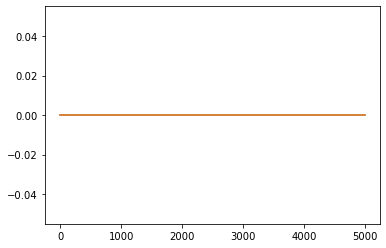

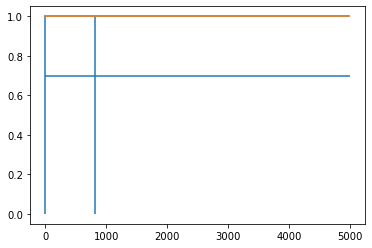

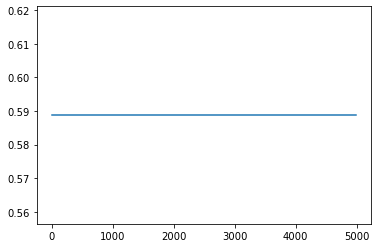

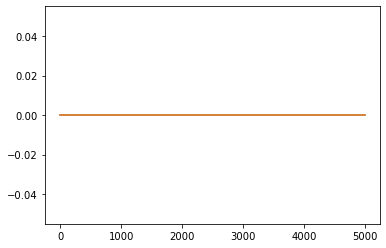

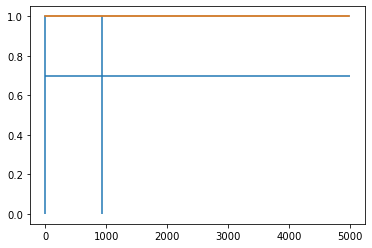

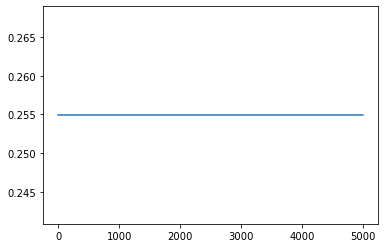

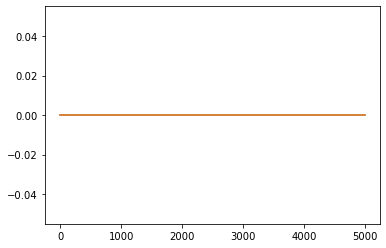

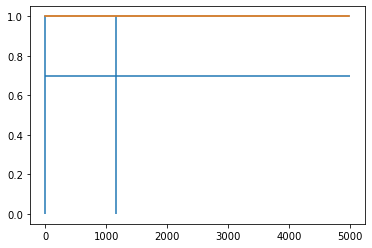

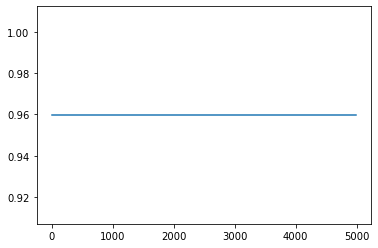

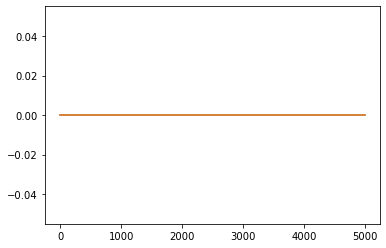

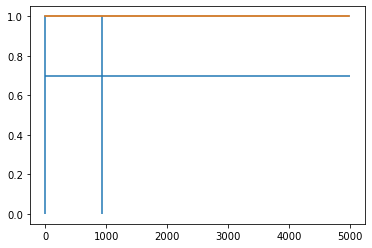

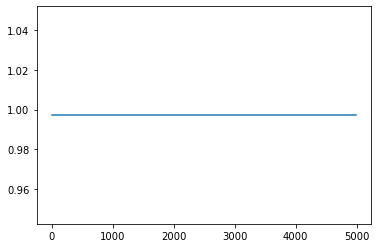

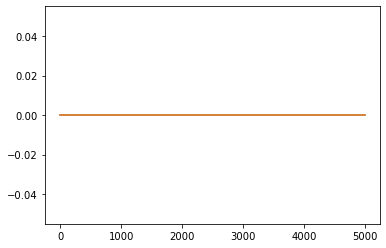

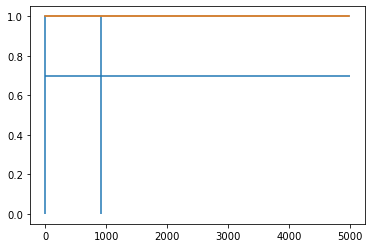

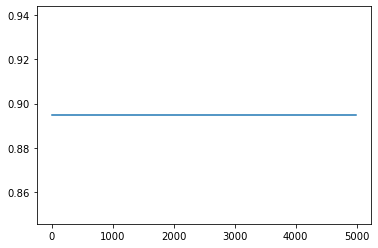

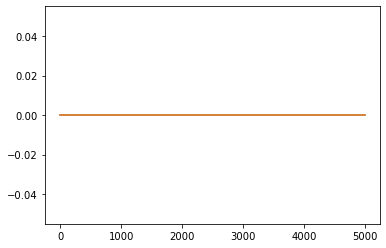

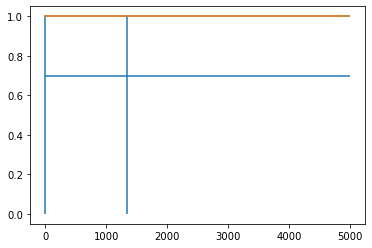

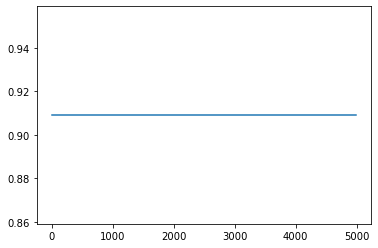

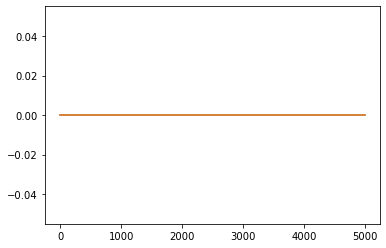

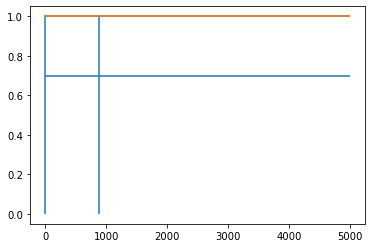

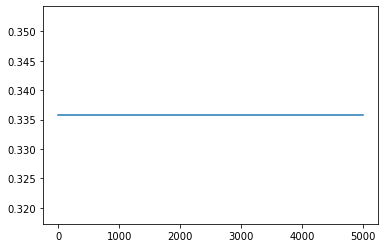

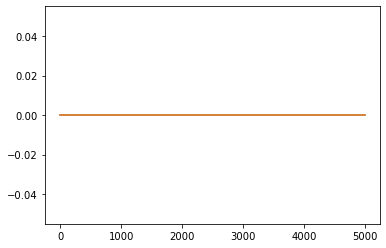

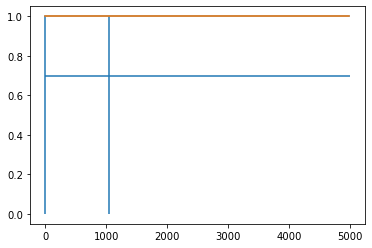

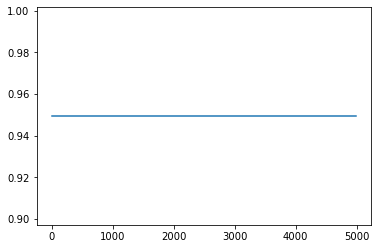

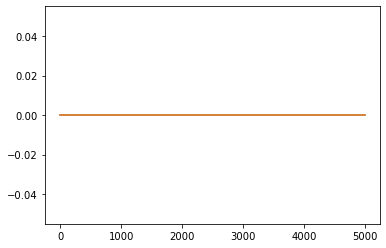

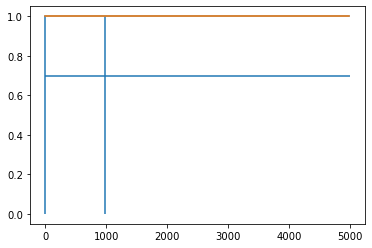

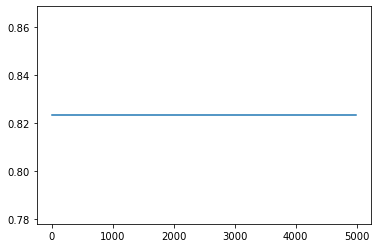

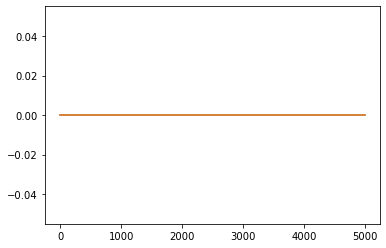

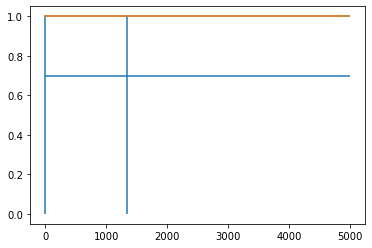

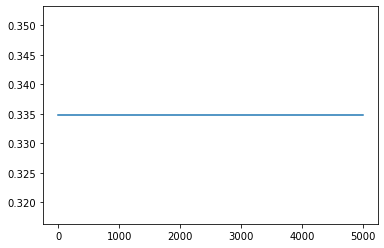

In [22]:
# plot example trials
#onsets = [p["onset_time"] for p in params]
onsets = target_onset[-N_batch:] + checker_onset[-N_batch:]
rts = rt[-N_batch:]
for i in range(0,10):
    plt.figure()
    plt.plot(np.arange(0, T, 10), inputs[i, :, 0])
    plt.plot(np.arange(0, T, 10), inputs[i, :, 1])

    plt.figure()
    plt.plot(np.arange(0, T, 10), outputs[i, :, 0])
    plt.plot(np.arange(0, T, 10), outputs[i, :, 1])
    
    plt.vlines(onsets[i], 0, 1)
    plt.vlines(onsets[i] + rts[i], 0, 1)
    plt.hlines(0.7, 0, T)
    plt.figure()
    plt.plot(np.arange(0, T, 10), g[i, :, :])

In [23]:
correct_side = (coherence > 0.5)
correct_side = 1 - 1*correct_side

checker_df = pd.DataFrame({'trial' : np.arange(trials),
                           # the real coherence based on left and right (positive: left evidence dominant
                           # negative: right evidence dominant)
                           'coherence' : 2*coherence - 1,
                           'coherence_bin' : np.round(2*coherence - 1, 1),
                           'correct_side' : correct_side,
                           'target_onset' : target_onset,
                           'checker_onset' : checker_onset,
                           'decision' : decision,
                           'decision_time' : rt,
                           'correct_decision' : (decision == correct_side).astype(int),
                          'g0' : g0,
                          'gSlope' : gSlope})

checker_mean = checker_df.groupby('coherence_bin').mean().reset_index()


print("Overall Accuracy: " + str(np.sum(checker_df["correct_decision"])/len(checker_df)))
print("Negative RT trials ratio: ", end = "")
print(np.sum(checker_df["decision_time"] < 0)/len(checker_df))



Overall Accuracy: 0.4998
Negative RT trials ratio: 1.0


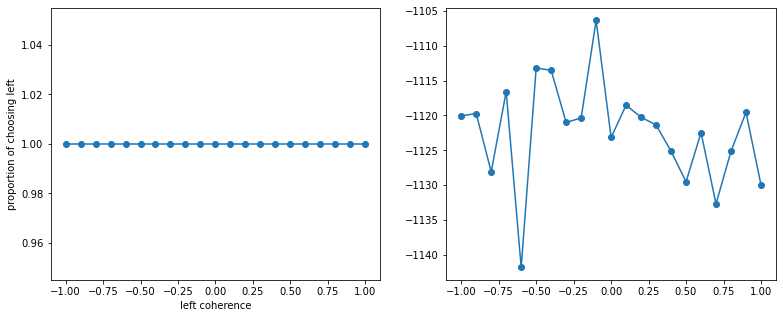

In [24]:
# psychrometric curve 
plt.figure(figsize=(13, 5))
plt.subplot(1,2,1)
plt.plot(checker_mean['coherence_bin'], 1-checker_mean['decision'])
plt.scatter(checker_mean['coherence_bin'], 1-checker_mean['decision'])
plt.xlabel("left coherence")
plt.ylabel("proportion of choosing left")
plt.subplot(1,2,2)
plt.plot(checker_mean['coherence_bin'], checker_mean['decision_time'])
plt.scatter(checker_mean['coherence_bin'], checker_mean['decision_time'])

